# Percolation Model


### Graph

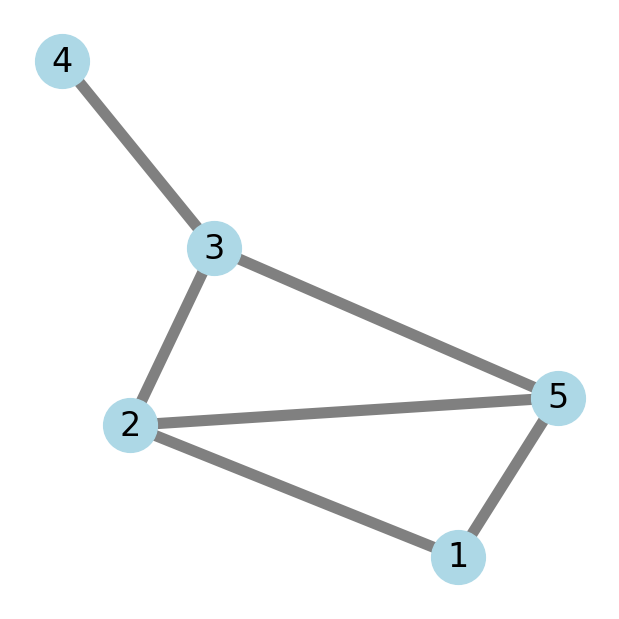

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 작은 예제 그래프 (기존 전역 G를 덮어쓰지 않도록 이름을 바꿉니다)
G_small = nx.Graph()
G_small.add_nodes_from([1, 2, 3, 4, 5])
G_small.add_edges_from([(1, 2), (2, 3), (3, 4), (1, 5), (2, 5), (3, 5)])

pos_small = nx.spring_layout(G_small)
plt.figure(figsize=(6, 6))
nx.draw(
    G_small,
    pos_small,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1500,
    width=8,
    font_size=24  # 노드 라벨 크기 조절
)
plt.show()

### Grid Graph With 난수 가중치

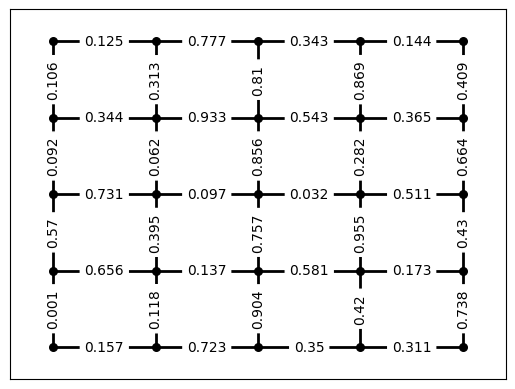

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# 그리드 그래프 생성
G = nx.grid_2d_graph(5,5)

# 간선마다 0~1 난수 할당
for u, v in G.edges():
    G[u][v]['w'] = round(random.random(), 3)

# 그래프 시각화
pos = {n: n for n in G.nodes()}

nx.draw_networkx_edges(G, pos, width=2, edge_color='black')
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='black')

# 라벨 추가
edge_labels = {(u, v): G[u][v]['w'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()


### 0.5보다 작은 간선만 남기기

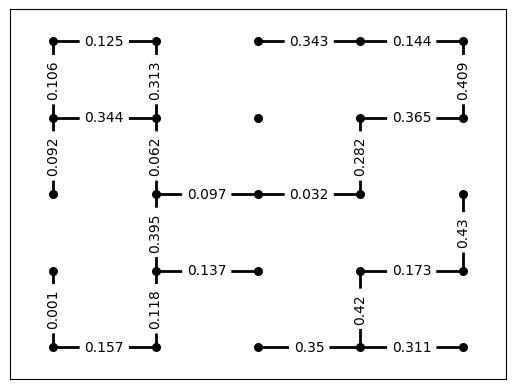

In [3]:
# 0.5 보다 작은 간선만 남기기, 라벨과 함께 시각화
H = nx.Graph()
H.add_nodes_from(G.nodes())
for u, v in G.edges():
    if G[u][v]['w'] < 0.5:
        H.add_edge(u, v, w=G[u][v]['w'])
pos_H = {n: n for n in H.nodes()}
nx.draw_networkx_edges(H, pos_H, width=2, edge_color='black')
nx.draw_networkx_nodes(H, pos_H, node_size=30, node_color='black')
edge_labels_H = {(u, v): H[u][v]['w'] for u, v in H.edges()}
nx.draw_networkx_edge_labels(H, pos_H, edge_labels=edge_labels_H, font_size=10)
plt.show()

### (1) Percolation 모델링

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

# 격자 크기
width = 20
G = nx.grid_2d_graph(width, width)

# 색상 생성 (RGB)
colors = [
    (random.random(), random.random(), random.random())
    for _ in range(width * width)
]

# 엣지 랜덤 weight 부여
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = random.random()

# 노드 위치 고정
pos = {n: n for n in G.nodes()}
def draw_graph(p: float):
    clear_output(wait=True)
    plt.figure(figsize=(8, 8))

    # p 이하인 엣지만 선택
    edges = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < p]

    # 부분 그래프 생성
    H = nx.Graph()
    H.add_edges_from(edges)

    # 엣지가 없는 노드도 포함
    nodes_in_edges = set([n for e in edges for n in e])
    isolated_nodes = [n for n in G.nodes() if n not in nodes_in_edges]
    H.add_nodes_from(isolated_nodes)

    # 연결 컴포넌트 추출
    components = list(nx.connected_components(H))

    # 컴포넌트별 색상 적용
    for i, comp in enumerate(components):
        sub_edges = [(u, v) for (u, v) in H.edges() if u in comp]
        edge_color = [colors[i % len(colors)]] * len(sub_edges)
        nx.draw_networkx_edges(H, pos, edgelist=sub_edges, width=2, edge_color=edge_color)
        nx.draw_networkx_nodes(H, pos, nodelist=list(comp), node_size=30,
                               node_color=[colors[i % len(colors)]] * len(comp))

    plt.xticks([])
    plt.yticks([])
    plt.title(f"p = {p:.2f}")
    plt.show()

interact(
    draw_graph,
    p=FloatSlider(min=0, max=1, step=0.01, value=0.5)
)


interactive(children=(FloatSlider(value=0.5, description='p', max=1.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.draw_graph(p: float)>

### (2)
그래프의 각 노드를 하나의 픽셀로 보고 렌더링 하면 아래와 같다.

In [18]:
from IPython.display import display, HTML

with open("index.html", "r", encoding="utf-8") as f:
    html_content = f.read()

display(HTML(html_content))

### (3) 듀얼 그래프

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output

# --- 설정 ---
width = 20
dual_width = width - 1
NODE_SIZE = 5 # 노드 크기

# --- 1 & 2. 그래프 생성 및 가중치 설정 (이전과 동일) ---
G_primal = nx.grid_2d_graph(width, width)
pos_primal = {n: n for n in G_primal.nodes()}
for (u, v) in G_primal.edges():
    G_primal.edges[u, v]['weight'] = random.random()

G_dual = nx.grid_2d_graph(dual_width, dual_width)
pos_dual = {n: (n[0] + 0.5, n[1] + 0.5) for n in G_dual.nodes()}

for (u, v) in G_primal.edges():
    w = G_primal.edges[u, v]['weight']
    x1, y1 = u
    x2, y2 = v
    if x1 == x2:
        u_dual = (x1 - 1, y1)
        v_dual = (x1, y1)
        if G_dual.has_edge(u_dual, v_dual):
            G_dual.edges[u_dual, v_dual]['weight'] = w
    elif y1 == y2:
        u_dual = (x1, y1 - 1)
        v_dual = (x1, y1)
        if G_dual.has_edge(u_dual, v_dual):
            G_dual.edges[u_dual, v_dual]['weight'] = w

# --- 4. 렌더링 함수 (V15: zorder 인수 제거) ---
def draw_graph_all_nodes_v15(p: float):
    clear_output(wait=True)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

    # --- 0. 모든 정점을 먼저 그립니다. ---
    # Primal 모든 정점 (검정색)
    nx.draw_networkx_nodes(G_primal, pos_primal, nodelist=G_primal.nodes(), 
                           node_color='black', node_size=NODE_SIZE, ax=ax)
    # Dual 모든 정점 (회색)
    nx.draw_networkx_nodes(G_dual, pos_dual, nodelist=G_dual.nodes(), 
                           node_color='gray', node_size=NODE_SIZE, ax=ax)

    # --- 1. Primal 그래프 엣지 (검정색 실선) ---
    edges_primal_active = [(u, v) for (u, v, d) in G_primal.edges(data=True) if d['weight'] < p]
    
    # Primal 활성화된 엣지 (검정색, 실선)
    nx.draw_networkx_edges(G_primal, pos_primal, edgelist=edges_primal_active, 
                           edge_color='black', style='solid', width=2, ax=ax)

    # --- 2. Dual 그래프 엣지 (회색 실선) ---
    edges_dual_active = [(u, v) for (u, v, d) in G_dual.edges(data=True) if 'weight' in d and d['weight'] >= p]
    
    # Dual 활성화된 엣지 (회색, 실선)
    nx.draw_networkx_edges(G_dual, pos_dual, edgelist=edges_dual_active, 
                           edge_color='gray', style='solid', width=2, ax=ax)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Primal (Black, w < {p:.2f}) & Dual (Gray, w >= {p:.2f})")
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

# --- 5. 인터랙티브 위젯 실행 ---
interact(
    draw_graph_all_nodes_v15, # 새 함수 이름으로 변경
    p=FloatSlider(min=0, max=1, step=0.01, value=0.5, description="p (Threshold)")
)

interactive(children=(FloatSlider(value=0.5, description='p (Threshold)', max=1.0, step=0.01), Output()), _dom…

<function __main__.draw_graph_all_nodes_v15(p: float)>

### (4) Box Counting Method 를 통해 프랙탈 여부 및 차원 확인

In [3]:
# 브라우저에서 "fractal-analysis.html" 파일 열기
import webbrowser
webbrowser.open_new_tab("fractal-analysis.html")



True

### (5) 3차원 Percolation 임계값 찾기

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import random
from ipywidgets import interact, FloatSlider, IntSlider
from IPython.display import clear_output
import numpy as np

# (선택) Jupyter에서 더 나은 인터랙션을 원하면 아래 주석 해제
# %matplotlib widget

def make_3d_percolation(N=10, seed=None):
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    G = nx.grid_graph(dim=[list(range(N)), list(range(N)), list(range(N))])
    for u, v in G.edges():
        G.edges[u, v]['weight'] = random.random()
    return G

def calculate_cluster_sizes(G, p_values):
    """
    모든 p 값에 대해 최대 클러스터 크기를 미리 계산합니다.
    """
    all_edges = list(G.edges(data=True))
    all_nodes = list(G.nodes())
    sizes = []

    for p in p_values:
        # p 값보다 작은 엣지 선택
        edges = [(u, v) for (u, v, d) in all_edges if d['weight'] < p]
        
        H = nx.Graph()
        H.add_edges_from(edges)
        # 중요: 엣지가 없는 노드도 포함해야 함
        H.add_nodes_from(all_nodes) 
        
        components = list(nx.connected_components(H))
        
        # 크기가 1보다 큰 (실제 연결된) 클러스터만 필터링
        real_components = [c for c in components if len(c) > 1]
        
        if real_components:
            largest_size = max(len(c) for c in real_components)
        else:
            largest_size = 0 # (또는 1, 정의하기 나름. 여기서는 '클러스터'를 2개 이상으로 봄)
            
        sizes.append(largest_size)
        
    return sizes


def draw_3d_percolation_with_plot(G, current_p, N, p_values, size_values, figsize=(8,8), node_size=30, edge_alpha=0.7):
    clear_output(wait=True)
    
    # 1x2 서브플롯: (왼쪽) 3D Percolation, (오른쪽) 크기 vs p 플롯
    fig = plt.figure(figsize=(figsize[0] * 2, figsize[1]))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax_plot = fig.add_subplot(1, 2, 2)
    ax.set_box_aspect((1,1,1))

    # --- 1. 3D Percolation 플롯 (ax) ---

    # 현재 p값(current_p) 기준으로 엣지 선택
    edges = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < current_p]

    H = nx.Graph()
    H.add_edges_from(edges)
    H.add_nodes_from(G.nodes())

    components = list(nx.connected_components(H))
    pos = {n: np.array(n, dtype=float) for n in G.nodes()}

    # 가장 큰 클러스터 찾기 (현재 p 기준)
    largest_comp_nodes = set()
    if components:
        real_components = [c for c in components if len(c) > 1]
        if real_components:
            largest_comp_nodes = max(real_components, key=len)

    # Draw edges: 가장 큰 클러스터는 붉은색, 나머지는 회색
    lines = []
    line_colors = []
    largest_color_edge = (1, 0, 0, edge_alpha) # Red
    other_color_edge = (0.5, 0.5, 0.5, edge_alpha * 0.3) # Gray
    
    for (u, v) in edges:
        lines.append([pos[u], pos[v]])
        if u in largest_comp_nodes:
            line_colors.append(largest_color_edge)
        else:
            line_colors.append(other_color_edge)

    if len(lines) > 0:
        lc = Line3DCollection(lines, colors=line_colors, linewidths=1.5)
        ax.add_collection3d(lc)

    # Draw nodes: 가장 큰 클러스터는 붉은색, 나머지는 회색
    node_xyz = np.array([pos[n] for n in G.nodes()])
    node_colors = []
    node_sizes = []
    
    comp_map = {}
    for i, comp in enumerate(components):
        for n in comp:
            comp_map[n] = i

    for n in G.nodes():
        if n in largest_comp_nodes:
            node_colors.append((1, 0, 0)) # Red
            node_sizes.append(node_size)
        elif n in comp_map and len(components[comp_map[n]]) > 1:
            node_colors.append((0.5, 0.5, 0.5)) # Other cluster
            node_sizes.append(node_size * 0.7)
        else:
            node_colors.append((0.85, 0.85, 0.85)) # Singleton
            node_sizes.append(max(6, node_size//3))
            
    xs = node_xyz[:,0]; ys = node_xyz[:,1]; zs = node_xyz[:,2]
    ax.scatter(xs, ys, zs, c=node_colors, s=node_sizes, depthshade=True)

    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.set_title(f'3D Percolation (N={N}, p={current_p:.2f})')
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.set_xlim(0-0.5, (N-1)+0.5)
    ax.set_ylim(0-0.5, (N-1)+0.5)
    ax.set_zlim(0-0.5, (N-1)+0.5)

    # --- 2. 최대 클러스터 크기 vs p 플롯 (ax_plot) ---
    ax_plot.plot(p_values, size_values, marker='.', linestyle='-', markersize=4, label='Largest Cluster Size')
    
    # 현재 p값 수직선으로 표시
    ax_plot.axvline(x=current_p, color='red', linestyle='--', label=f'Current p={current_p:.2f}')
    
    # 임계값 근처 표시 (이론값)
    
    
    ax_plot.set_title(f"Largest Cluster Size vs. p (N={N})")
    ax_plot.set_xlabel("Probability (p)")
    ax_plot.set_ylabel("Largest Cluster Size (nodes)")
    
    # Y축 최대값을 전체 노드 수로 설정 (N*N*N)
    ax_plot.set_ylim(0, N*N*N) 
    ax_plot.set_xlim(0, 1)
    ax_plot.legend()
    ax_plot.grid(True, linestyle=':')

    plt.tight_layout()
    plt.show()

# interactive wrapper
def interactive_3d_with_plot(N=10, p=0.3, seed=42):
    # N이나 seed가 바뀌면 그래프와 데이터를 새로 계산
    G = make_3d_percolation(N=N, seed=seed)
    
    # p-value 그래프 데이터 계산 (해상도 0.02)
    p_step = 0.02
    p_values_for_plot = np.arange(0, 1 + p_step, p_step)
    size_values_for_plot = calculate_cluster_sizes(G, p_values_for_plot)
    
    # 시각화 함수 호출 (현재 p값과 전체 데이터 전달)
    draw_3d_percolation_with_plot(G, p, N, p_values_for_plot, size_values_for_plot)

# 실행:
interact(
    interactive_3d_with_plot,
    N=IntSlider(value=100, min=4, max=100, step=1, description='Grid N'),
    p=FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, description='p', readout_format='.2f'),
    seed=IntSlider(value=42, min=0, max=9999, step=1, description='seed')
)